# Making Figures with Matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import ast
import csv

### Size specs

In [2]:
XS      = 14
XS2     = 10
YS      = 5
BIGGER  = 22
SMALLER = 16
MARKER  = 8
LINEWIDTH=2

colors = ['#E27100', '#1b85b8', '#559e83', '#b26167']

### Read in the data from csv files

In [3]:
df1 = pd.read_csv('./lg_md.csv', index_col='Epoch')

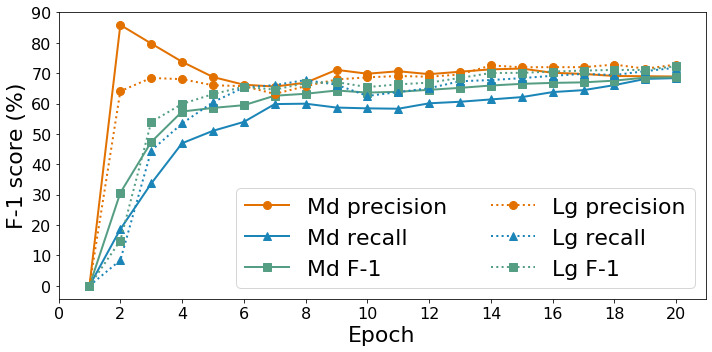

In [4]:
# New version of Figure 1
plt.figure(figsize=(XS2, YS))

cols = df1.columns
styles=['o-', '^-', 's-', 'o:', '^:', 's:']
mycols=['Md precision', 'Md recall', 'Md F-1', 'Lg precision', 'Lg recall', 'Lg F-1']
for (col, mycol, style, color) in zip(cols, mycols, styles, colors[0:3]*2):
    plt.plot(df1[col], style, color=color, label=mycol, markersize=MARKER, linewidth=LINEWIDTH)
plt.xticks(np.arange(df1.index[0] - 1, df1.index[-1] + 1, (df1.index[-1] - df1.index[0] + 1) // 10), fontsize=SMALLER)
plt.yticks(np.arange(0, 91, 10), fontsize=SMALLER)
plt.ylabel('F-1 score (%)', fontsize=BIGGER)
plt.xlabel('Epoch', fontsize=BIGGER)
plt.legend(loc='best', fontsize=BIGGER, ncol=2)
plt.tight_layout()
plt.savefig('./lg_md.pdf')
plt.show()

In [5]:
df2 = pd.read_csv("./num_of_eg.csv", index_col="Number of Training Examples")

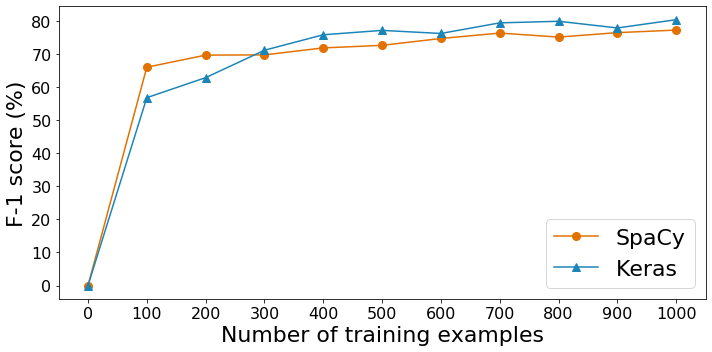

In [6]:
plt.figure(figsize=(XS2, YS))

cols   = df2.columns
styles = ['o-', '^-']

for (col, style, color) in zip(cols, styles, colors):
    plt.plot(df2[col]*100, style, color=color, label=col, markersize=MARKER)
    
plt.xticks(np.arange(0, 1001,100), fontsize=SMALLER)
plt.yticks(np.arange(0, 90, 10), fontsize=SMALLER)
plt.ylabel('F-1 score (%)', fontsize=BIGGER)
plt.xlabel('Number of training examples', fontsize=BIGGER)
plt.legend(loc='best', fontsize=BIGGER)
plt.tight_layout()
plt.savefig('./num_of_eg.pdf')
plt.show()

In [7]:
df3 = pd.read_csv('./spacy_epochs.csv', index_col='Epoch')

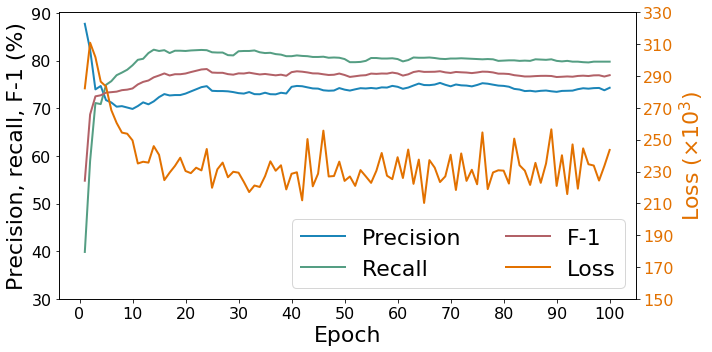

#E27100
['#1b85b8', '#559e83', '#b26167']


In [8]:
# New version of Figure 3

fig, ax1 = plt.subplots(figsize=(XS2, YS))
ax2 = ax1.twinx()
cols = ['Loss', 'Precision', 'Recall', 'F-1']

ax2.plot(df3[cols[0]], color=colors[0], label='Loss', linewidth=LINEWIDTH)
for (col, color) in zip(cols[1:], colors[1:]):
    ax1.plot(df3[col], color=color, label=col, linewidth=LINEWIDTH)

ax1.set_xticks(np.arange(0, 101, 10))
ax1.tick_params(axis='x', labelsize=SMALLER)
ax1.set_xlabel('Epoch', fontsize=BIGGER)

ax1.set_ylabel('Precision, recall, F-1 (%)', fontsize=BIGGER)
ax1.set_yticks(np.arange(30, 91, 10))
ax1.tick_params(axis='y', labelsize=SMALLER)

ax2.set_ylabel(r'Loss ($\times 10^3$)', fontsize=BIGGER, color=colors[0])
ax2.set_yticks(np.arange(150, 331, 20)) 
ax2.tick_params(axis='y', labelsize=SMALLER, labelcolor=colors[0])

# fix legends
legends = ax1.get_lines()+ax2.get_lines()
labels = [l.get_label() for l in legends]
ax1.legend(legends, labels, loc='best', fontsize=BIGGER, ncol=2)

plt.tight_layout()
plt.savefig('./spacy_epochs.pdf') # must save before calling `show()` as that would create a new figure
plt.show()
print(colors[0])
print(colors[1:4])

In [9]:
df4 = pd.read_csv("./lstm_epoch_accu.csv", index_col="Epoch")
df5 = pd.read_csv("./lstm_epoch_loss.csv", index_col="Epoch")

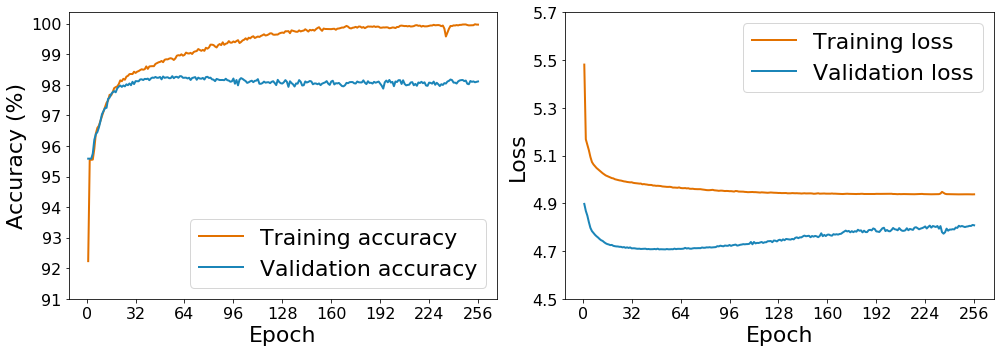

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(XS,YS))

cols4  = df4.columns
mycols4=['Training accuracy', 'Validation accuracy']
for (col, mycol, color) in zip(cols4, mycols4, colors):
    ax1.plot(df4[col]*100, color=color, label=mycol, markersize=MARKER, linewidth=LINEWIDTH)
    
ax1.set_xlabel('Epoch', fontsize=BIGGER)
ax1.legend(loc='best', fontsize=BIGGER)
ax1.set_xticks(np.arange(0, 257,32))
ax1.set_yticks(np.arange(91, 101, ))
ax1.set_ylabel('Accuracy (%)', fontsize=BIGGER)
ax1.tick_params(axis='y', labelsize= SMALLER)
ax1.tick_params(axis='x', labelsize= SMALLER)

cols5  = df5.columns
mycols5=['Training loss', 'Validation loss']
for (col, mycol, color) in zip(cols5, mycols5, colors):
    ax2.plot(df5[col], color=color, label=mycol, markersize=MARKER, linewidth=LINEWIDTH)
    
ax2.set_xlabel('Epoch', fontsize=BIGGER)
ax2.legend(loc='best', fontsize=BIGGER)
ax2.set_xticks(np.arange(0, 257, 32))
ax2.set_yticks(np.arange(4.5, 5.8, 0.2))
ax2.tick_params(axis='y', labelsize=SMALLER)
ax2.tick_params(axis='x', labelsize=SMALLER)

ax2.set_ylabel('Loss', fontsize=BIGGER)

plt.tight_layout()
plt.savefig('./lstm_epoch_accu_loss.pdf')
plt.show()

In [3]:
df6 = pd.read_csv('cross_checked_combined_body_extraction_results_all.csv', header=0)
df_balanced = df6[(0.1 < df6['Keras-count']/df6['SpaCy-count']) & (df6['Keras-count']/df6['SpaCy-count'] < 10)]

In [4]:
df_db = pd.read_csv('drugbank-parsed.csv', header=0, index_col=0)
df_db = df_db[df_db['atc_codes']!='[]']

In [5]:
def percentage_in_drugbank(l: list) -> tuple:
    name_overlap = set(l).intersection(all_names_lowercase_set)
    word_overlap = set(l).intersection(all_words_lowercase_set)
    return name_overlap, word_overlap

In [6]:
drug_names_lowercase = [drug.strip().lower() for drug in df_db['name']]
_d = [drug.split(' ') for drug in drug_names_lowercase]
drug_words_lowercase = [drug for drug in list(itertools.chain.from_iterable(_d))]
drug_names_lowercase_dict = dict.fromkeys(drug_names_lowercase, "T")
drug_words_lowercase_dict = dict.fromkeys(drug_words_lowercase, "T")

_a = [ast.literal_eval(l) for l in list(df_db['aliases'])]
alias_names_lowercase = [x.lower() for x in list(itertools.chain.from_iterable(_a)) if x[0] != '\\']
_a = [alias.split(' ') for alias in alias_names_lowercase]
alias_words_lowercase = [alias for alias in list(itertools.chain.from_iterable(_a))]
alias_names_lowercase_dict = dict.fromkeys(alias_names_lowercase, 'T')
alias_words_lowercase_dict = dict.fromkeys(alias_words_lowercase, 'T')

all_names_lowercase_set = set(drug_names_lowercase_dict).union(set(alias_names_lowercase_dict))
all_words_lowercase_set = set(drug_words_lowercase_dict).union(set(alias_words_lowercase_dict))

name_overlap_total = list()
word_overlap_total = list()
num_range = range(100, 1001, 100)
for num in num_range:
    name_overlap, word_overlap = percentage_in_drugbank(df6['Entity'][:num])
    name_overlap_total.append(len(name_overlap)/num*100)
    word_overlap_total.append(len(word_overlap)/num*100)

name_overlap_balanced = list()
word_overlap_balanced = list()
for num in num_range:
    name_overlap, word_overlap = percentage_in_drugbank(df_balanced['Entity'][:num])
    name_overlap_balanced.append(len(name_overlap)/num*100)
    word_overlap_balanced.append(len(word_overlap)/num*100)

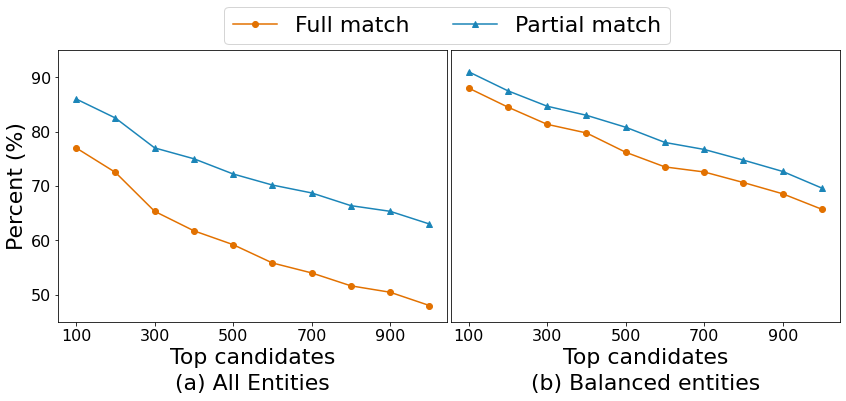

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(XS,YS))

ax1.plot(num_range, name_overlap_total, 'o-', color=colors[0], label='Full match')
ax1.plot(num_range, word_overlap_total, '^-', color=colors[1], label="Partial match")
ax1.set_xlabel('Top candidates', fontsize=BIGGER)
ax1.set_ylabel('Percent (%)', fontsize=BIGGER)
ax1.set_xticks(range(100, 1001, 200))
ax1.text(0.5,-0.25, "(a) All Entities", size=BIGGER, ha="center", transform=ax1.transAxes)
ax1.set_ylim([45,95])
ax1.tick_params(axis='x', labelsize=SMALLER)
ax1.tick_params(axis='y', labelsize=SMALLER)

ax1.legend(loc='upper center', bbox_to_anchor=(1, 1.2), ncol=2, fontsize=BIGGER)

ax2.plot(num_range, name_overlap_balanced, 'o-', color=colors[0], label='Full match')
ax2.plot(num_range, word_overlap_balanced, '^-', color=colors[1], label="Partial match")
ax2.set_ylim([45,95])
ax2.set_xlabel('Top candidates', fontsize=BIGGER)
ax2.set_xticks(range(100, 1001, 200))
ax2.text(0.5,-0.25, "(b) Balanced entities", size=BIGGER, ha="center", transform=ax2.transAxes)
ax2.tick_params(axis='x', labelsize=SMALLER)
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.subplots_adjust(wspace=0.01)

#plt.tight_layout()
fig.savefig('cmp_to_drugbank.pdf')

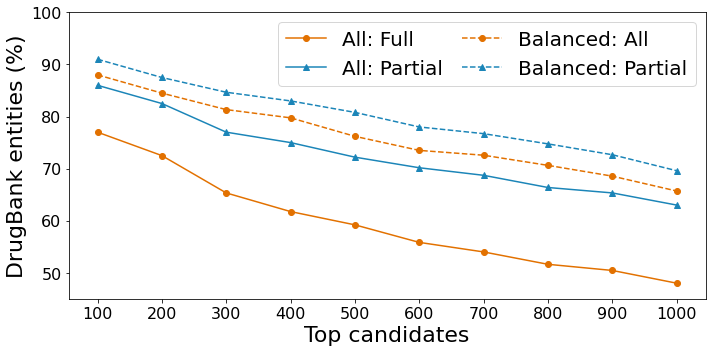

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(XS2,YS))

ax.set_ylim([45,100])
#ax.plot(num_range, name_overlap_total, 'o-', color=colors[0], label='Full match: All')
#ax.plot(num_range, word_overlap_total, '^-', color=colors[1], label="Partial match: All")
#ax.plot(num_range, name_overlap_balanced, 'o:', color=colors[0], label='Full match: Balanced')
#ax.plot(num_range, word_overlap_balanced, '^:', color=colors[1], label="Partial match: Balanced")
ax.plot(num_range, name_overlap_total, 'o-', color=colors[0], label='All: Full')
ax.plot(num_range, word_overlap_total, '^-', color=colors[1], label='All: Partial')
ax.plot(num_range, name_overlap_balanced, 'o--', color=colors[0], label='Balanced: All')
ax.plot(num_range, word_overlap_balanced, '^--', color=colors[1], label='Balanced: Partial')
ax.set_xlabel('Top candidates', fontsize=BIGGER)
ax.set_ylabel('DrugBank entities (%)', fontsize=BIGGER)
ax.set_xticks(range(100, 1001, 100))
ax.tick_params(axis='x', labelsize=SMALLER)
ax.tick_params(axis='y', labelsize=SMALLER)
ax.legend(loc='best', fontsize=20, ncol=2, columnspacing=1)

plt.tight_layout()
fig.savefig('cmp_to_drugbank2.pdf')